In [1]:
# Plot all cases

import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
myFmt = mdates.DateFormatter('%H:%M')
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')
import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import ucla_time2useful_time
myFmt = mdates.DateFormatter('%H:%M')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/06_UCLA_single_runs/"

controle = "/home/qwertz/UCLA/uclales/Runs/00_CONTROLE/"
sst_minus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/"
sst_plus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/"
ccn_plus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_PLUS/"
ccn_minus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_MINUS/"
grid5_00 = "/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/"
grid_icon_00 ="/home/qwertz/UCLA/uclales/Runs/00_GRID_ICONLES/"
high_smagorinsky_22 = "/home/qwertz/UCLA/uclales/Runs/22_HighSMAG_ICON/"
low_smagorinsky_22 ="/home/qwertz/UCLA/uclales/Runs/22_LowSMAG_ICON/"

dictionary = {"Controle":controle, "SST_minus": sst_minus00, "SST_plus": sst_plus00, "CCN_plus": ccn_plus00,\
              "CCN_minus": ccn_minus00, "grid5_00": grid5_00, "Grid_ICON": grid_icon_00,\
             "High_Smagorinsky": high_smagorinsky_22, "Low_Smagorinsky": low_smagorinsky_22}
divergence = 2.265684e-6

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Calculate Boundary layer tendency:

def calculate_dts(t_arraz):
    dts = np.zeros([len(t_arraz)-1])
    for i, timestep in enumerate(t_arraz):
        if i==len(t_arraz)-1:
            break
        timedelta = t_arraz[i+1]-timestep
        seconds = int(timedelta / np.timedelta64(1, 's'))
        dts[i] = seconds
    return dts

###############################

def calculate_we_by_time(dzdt, zis, div=4e-6):
    we = np.zeros([len(dzdt)])
    for i,zi in enumerate(zis):
        if i==len(zis)-1:
            break
        we[i] = dzdt[i] + div*zi 
    return we

##################################

Controle /home/qwertz/UCLA/uclales/Runs/00_CONTROLE/
SST_minus /home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/
SST_plus /home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/
CCN_plus /home/qwertz/UCLA/uclales/Runs/00_CCN_PLUS/
CCN_minus /home/qwertz/UCLA/uclales/Runs/00_CCN_MINUS/
grid5_00 /home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/
Grid_ICON /home/qwertz/UCLA/uclales/Runs/00_GRID_ICONLES/
High_Smagorinsky /home/qwertz/UCLA/uclales/Runs/22_HighSMAG_ICON/
Low_Smagorinsky /home/qwertz/UCLA/uclales/Runs/22_LowSMAG_ICON/


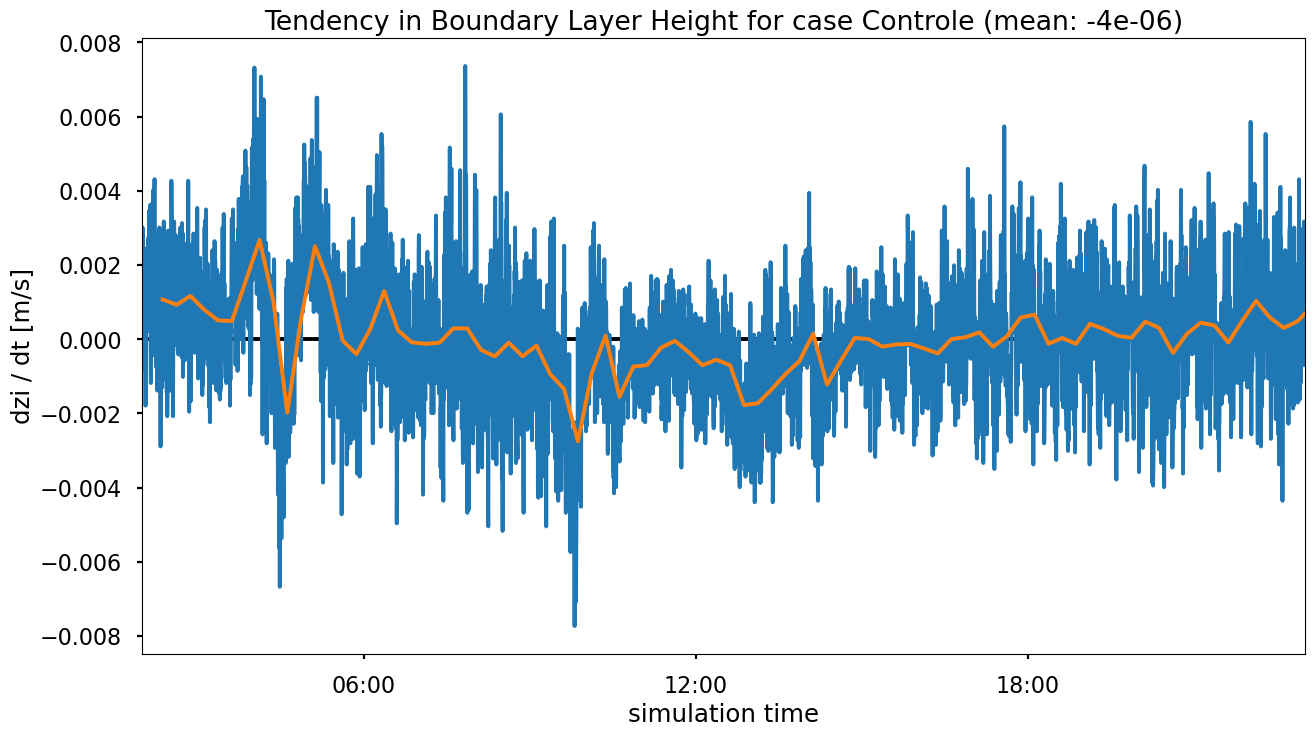

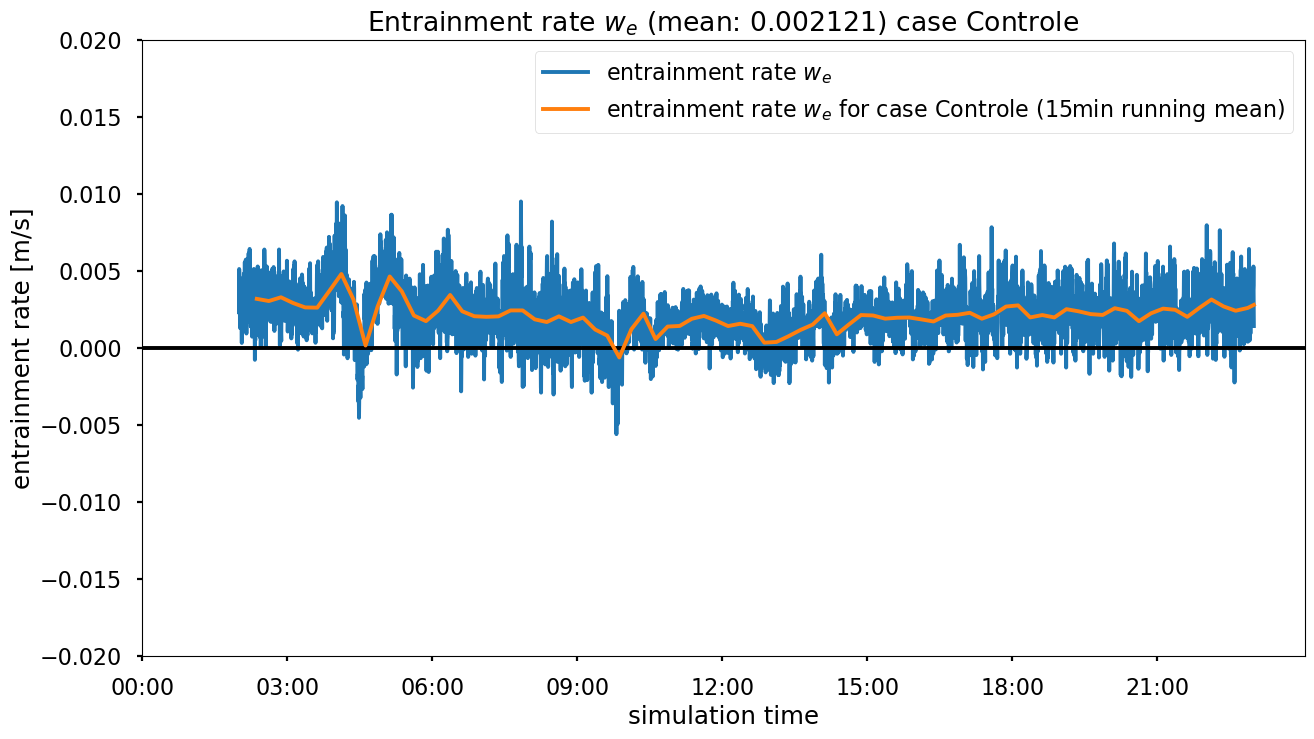

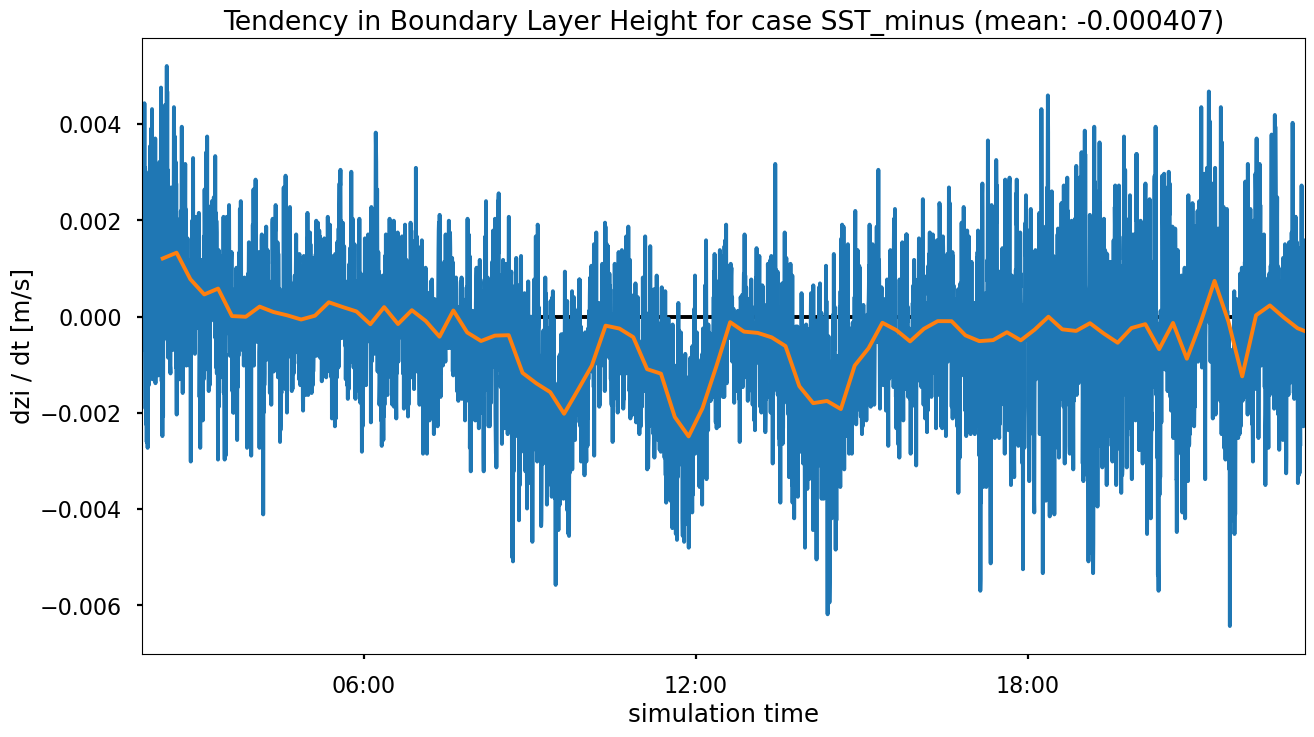

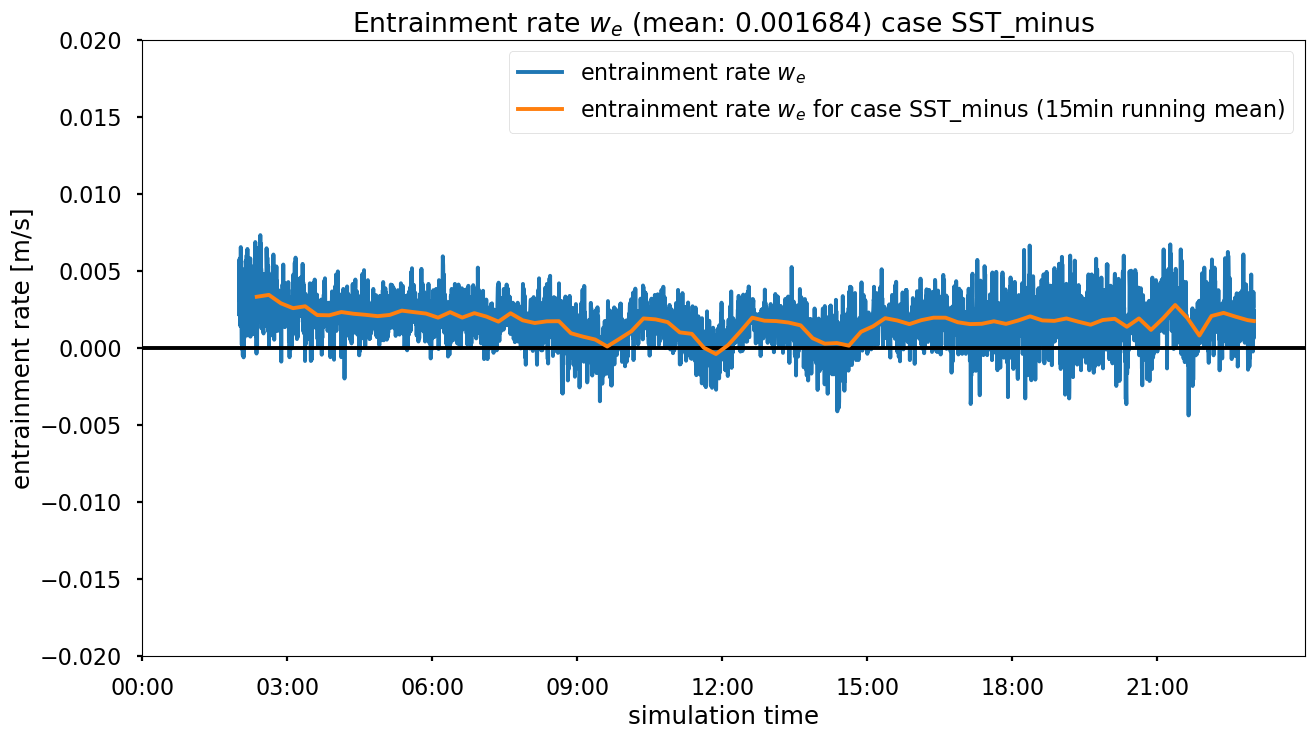

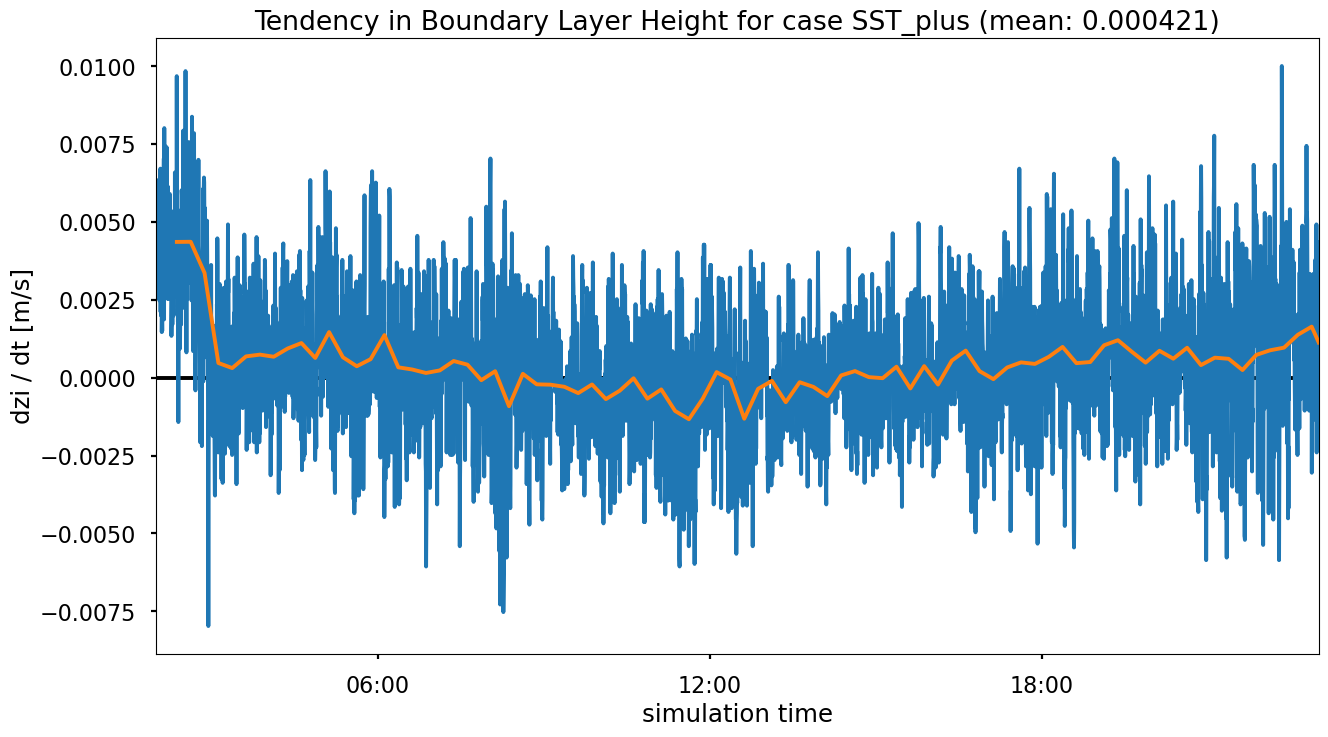

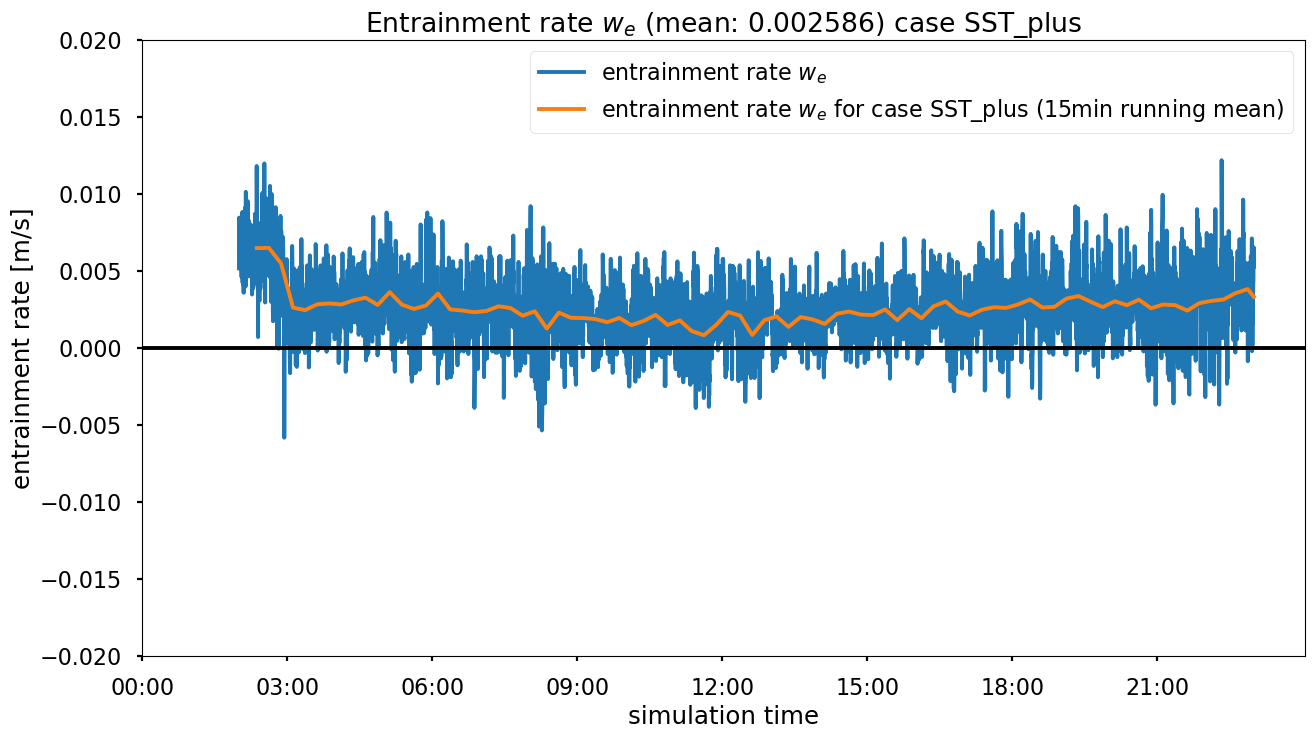

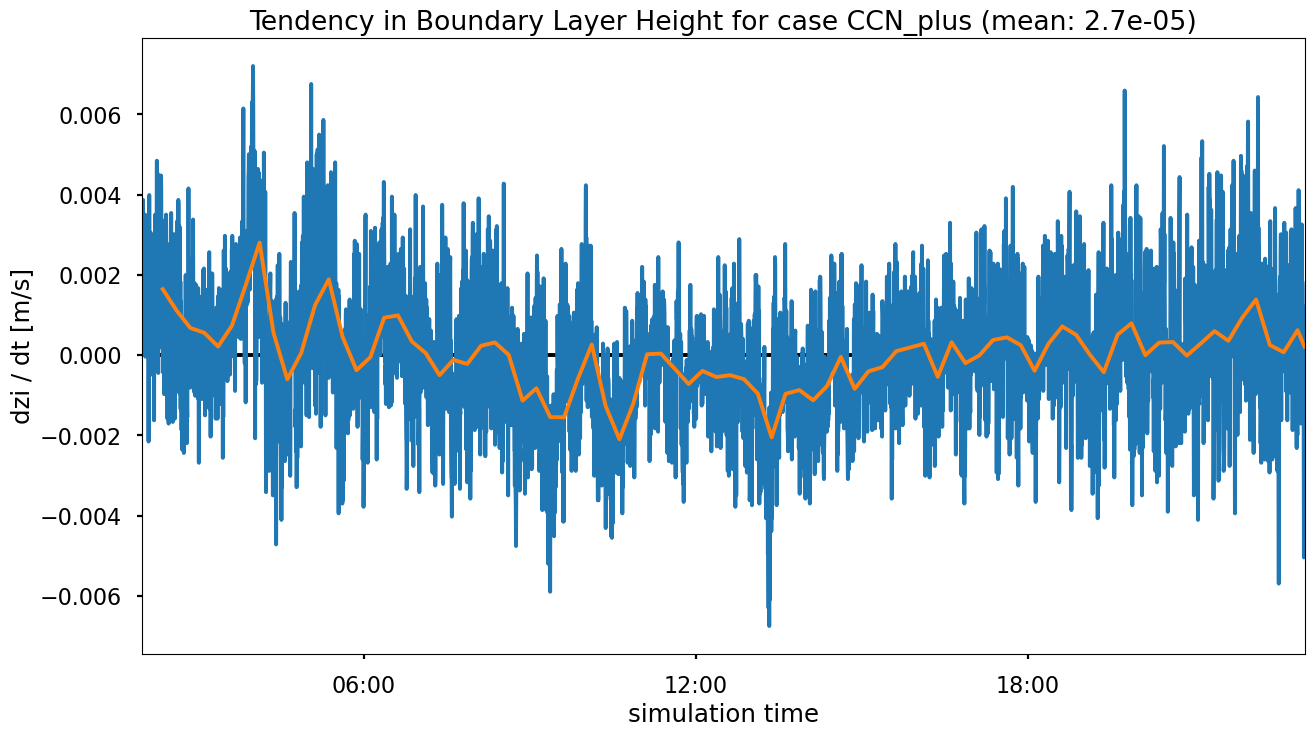

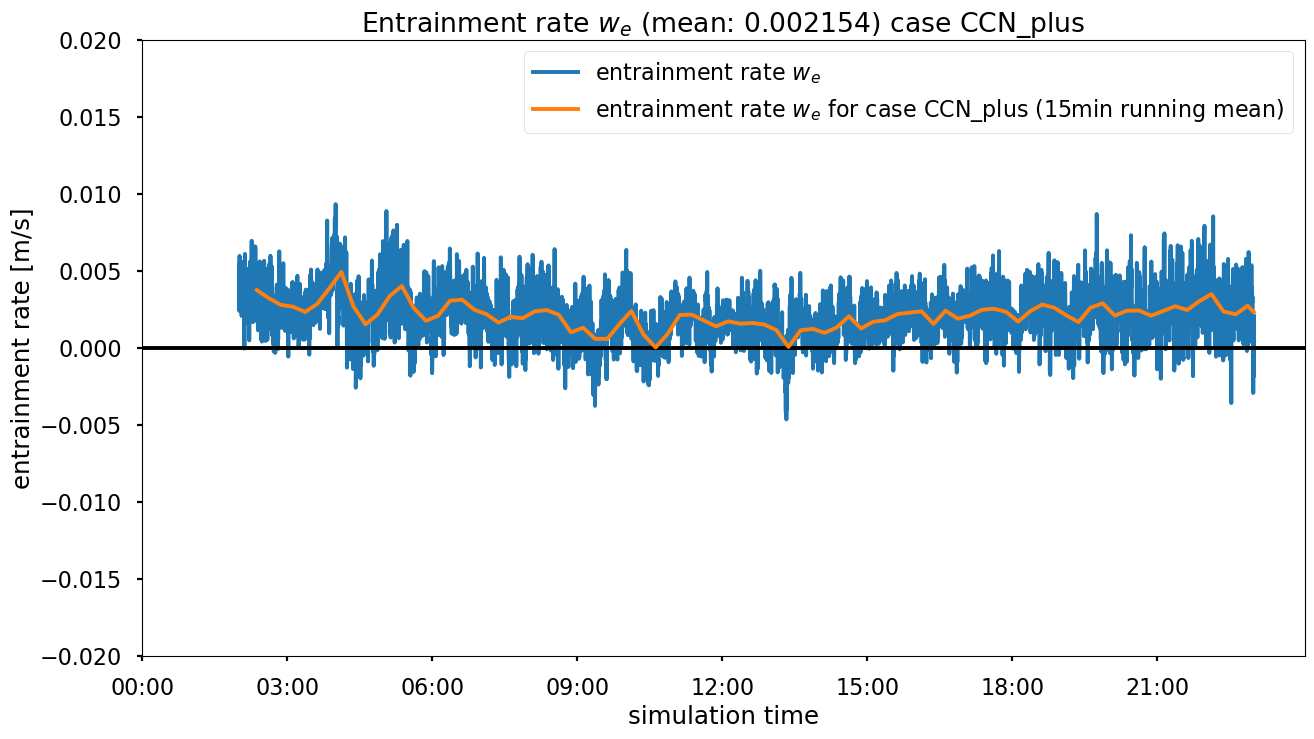

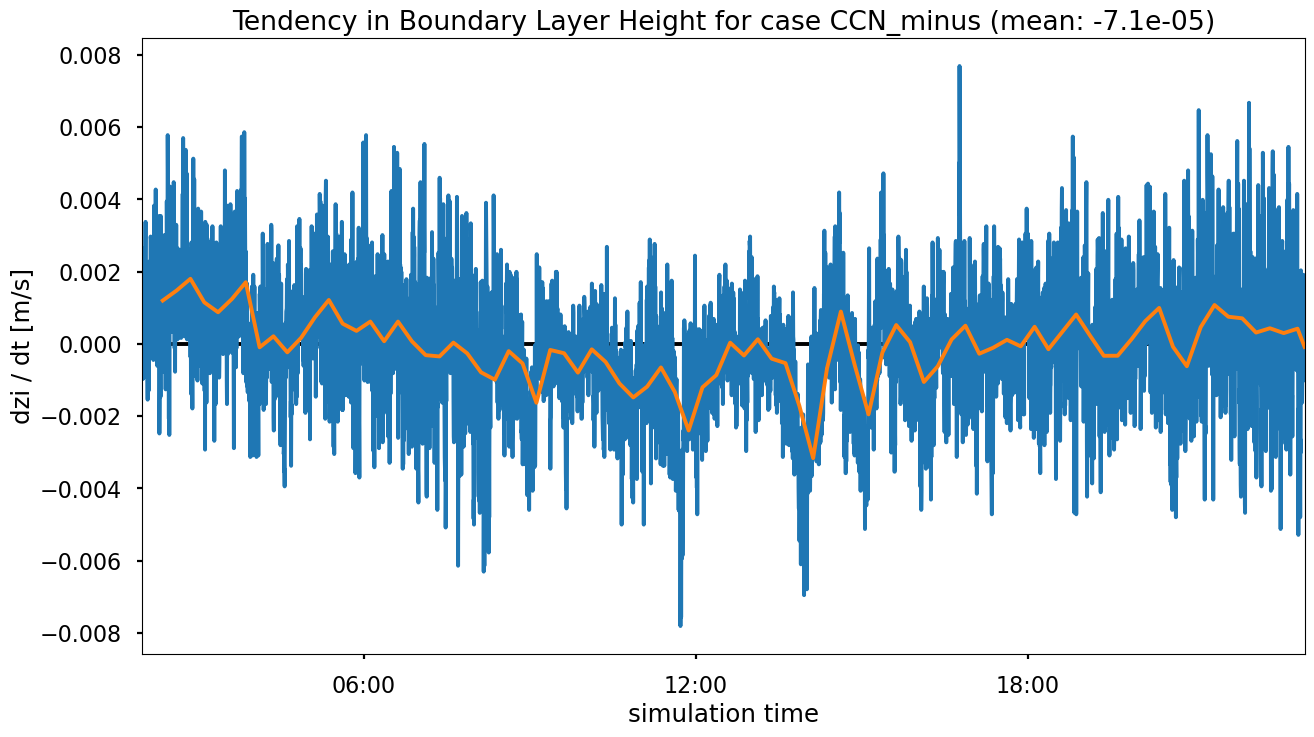

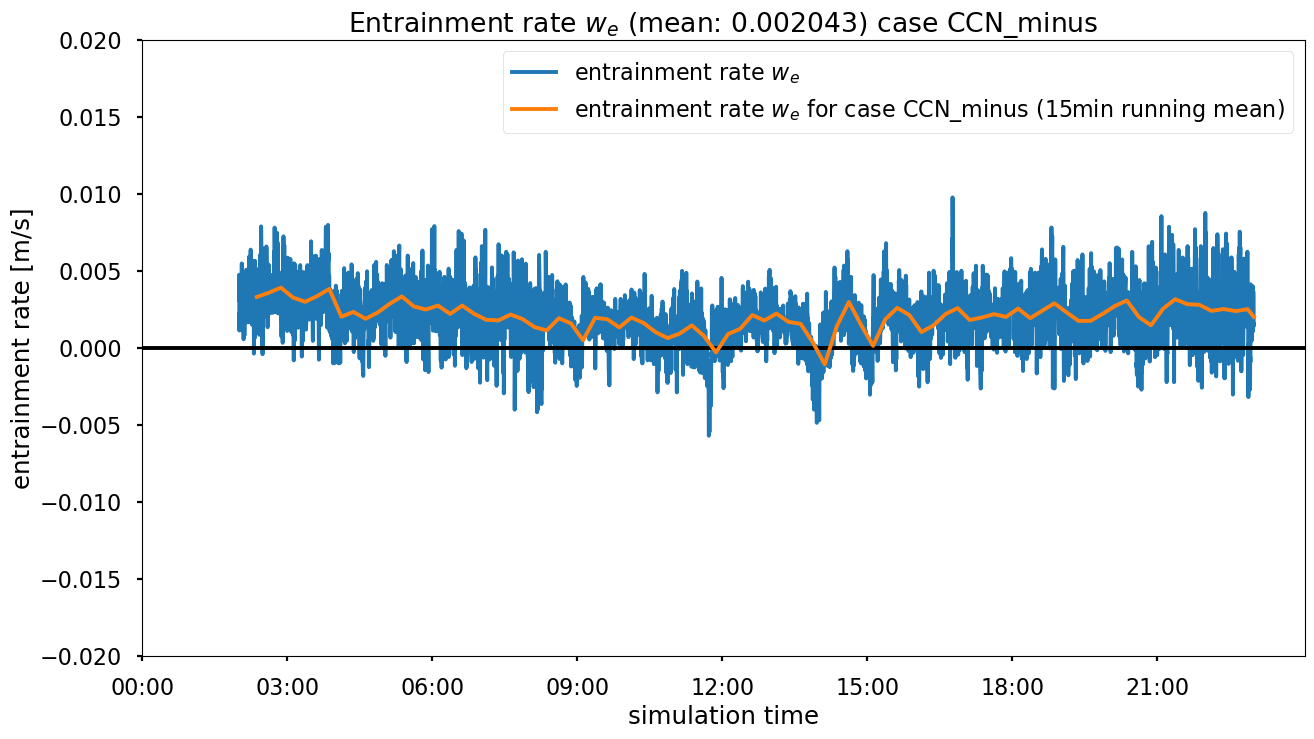

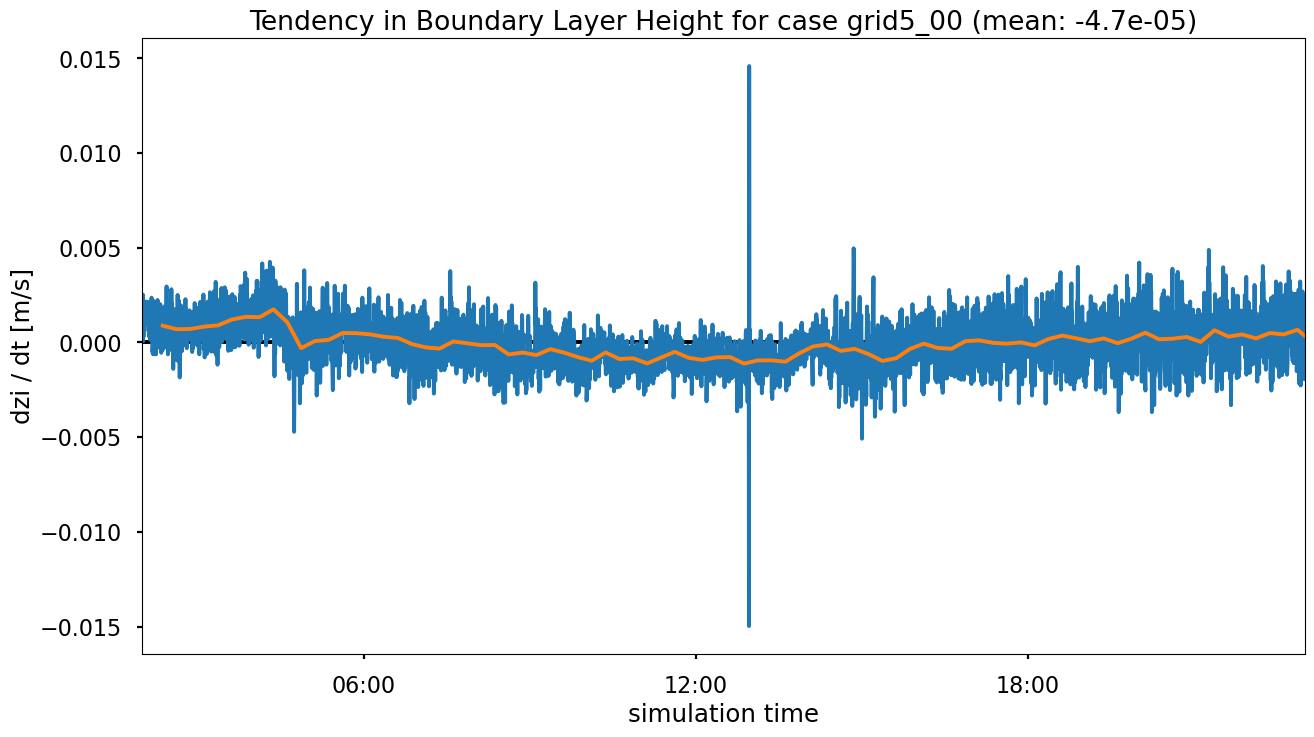

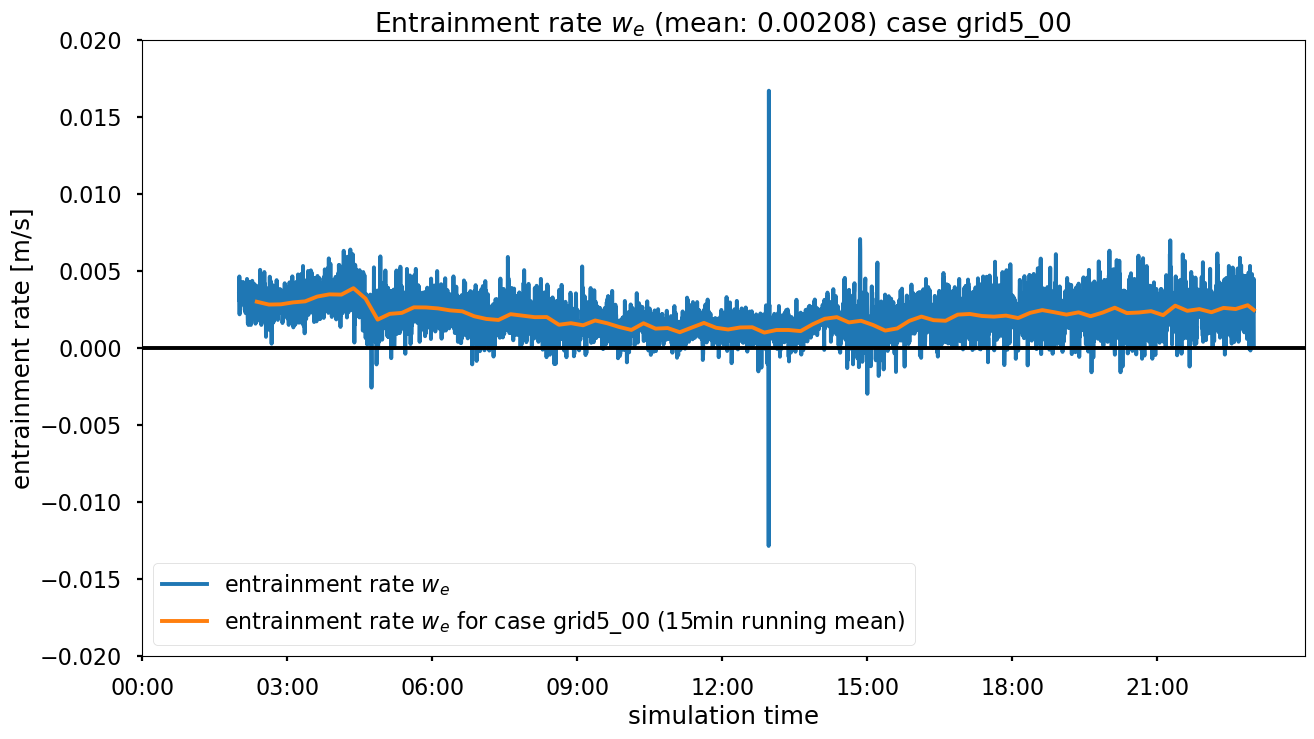

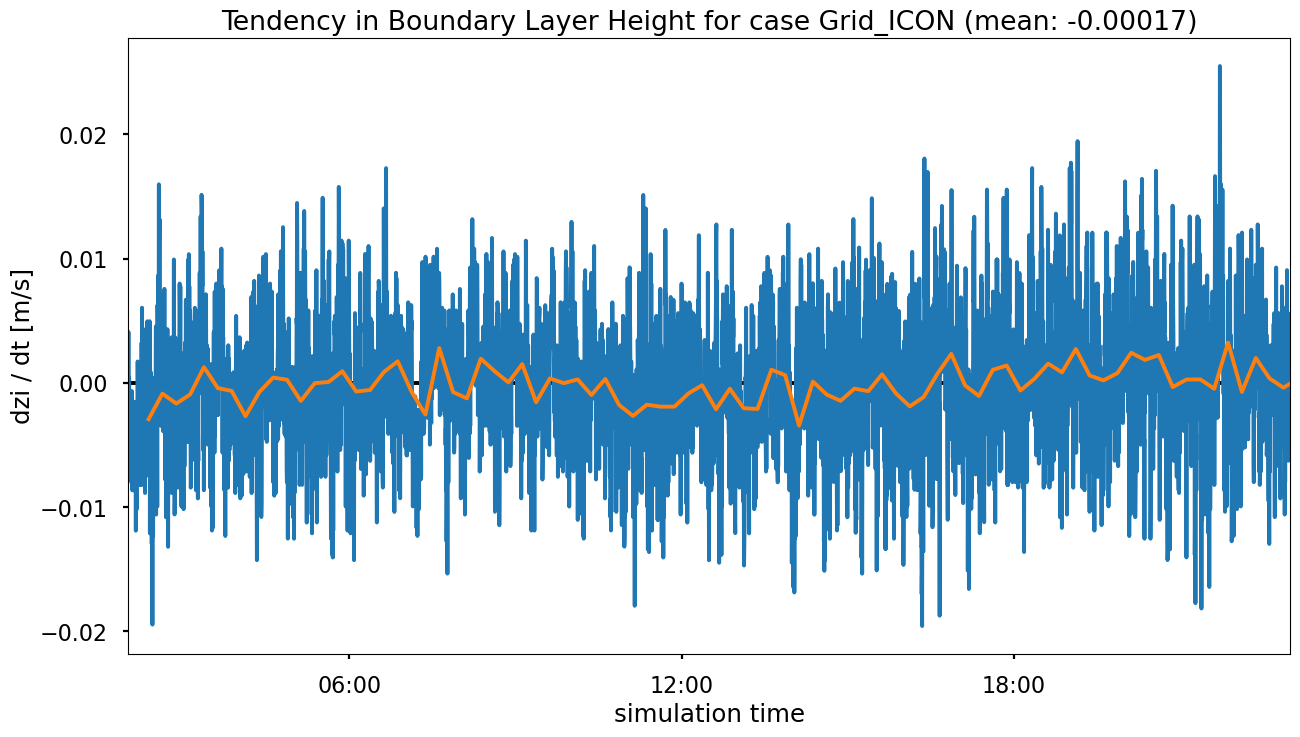

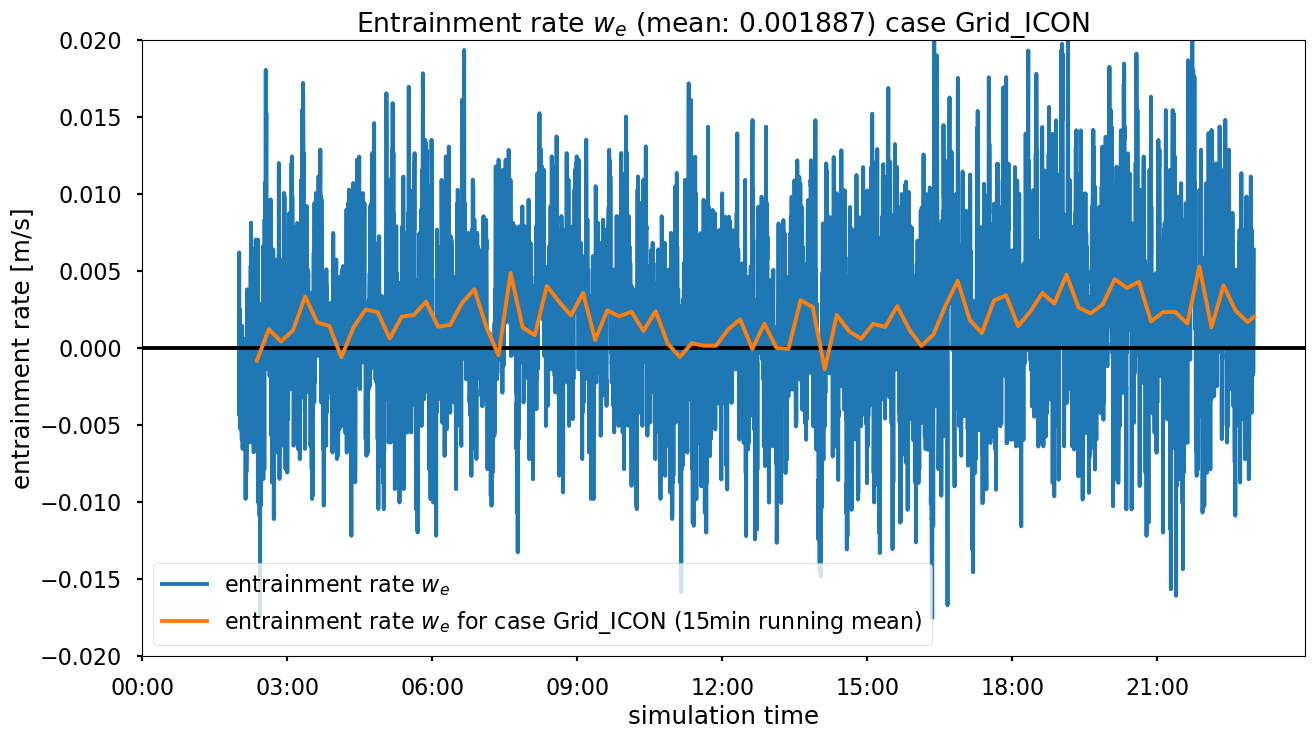

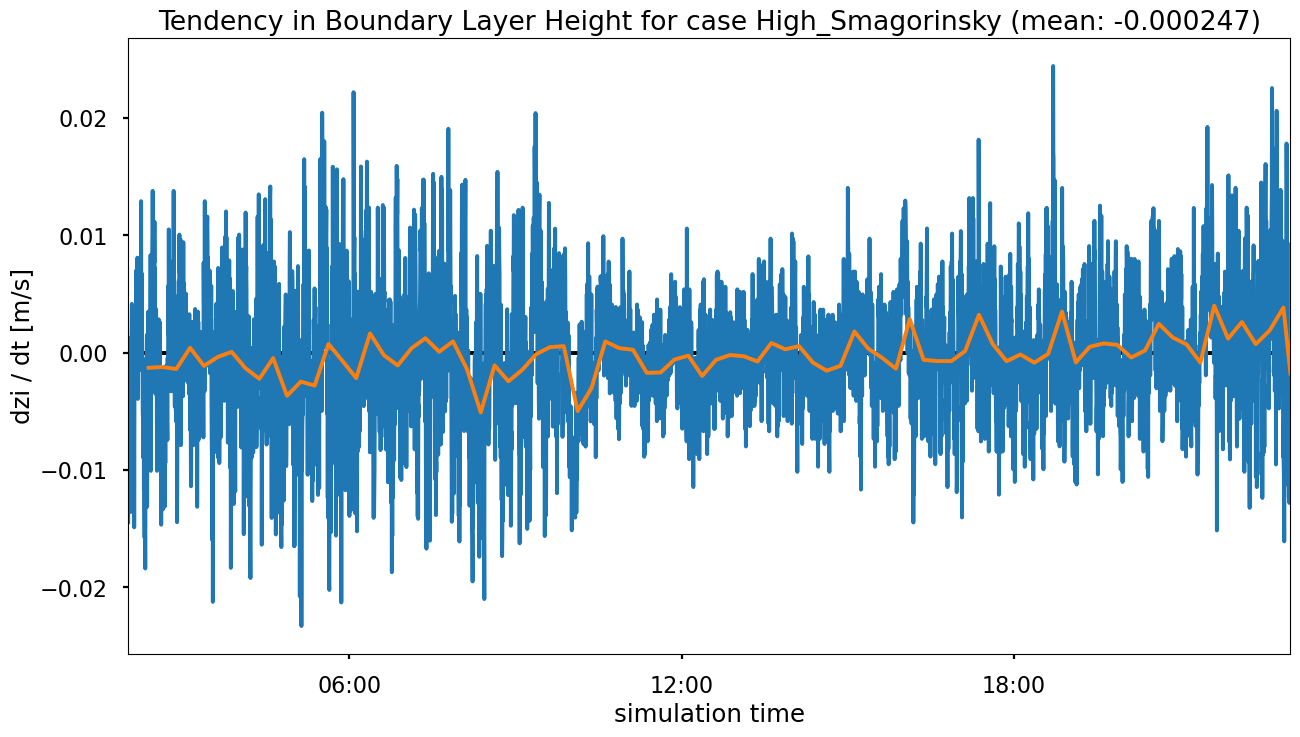

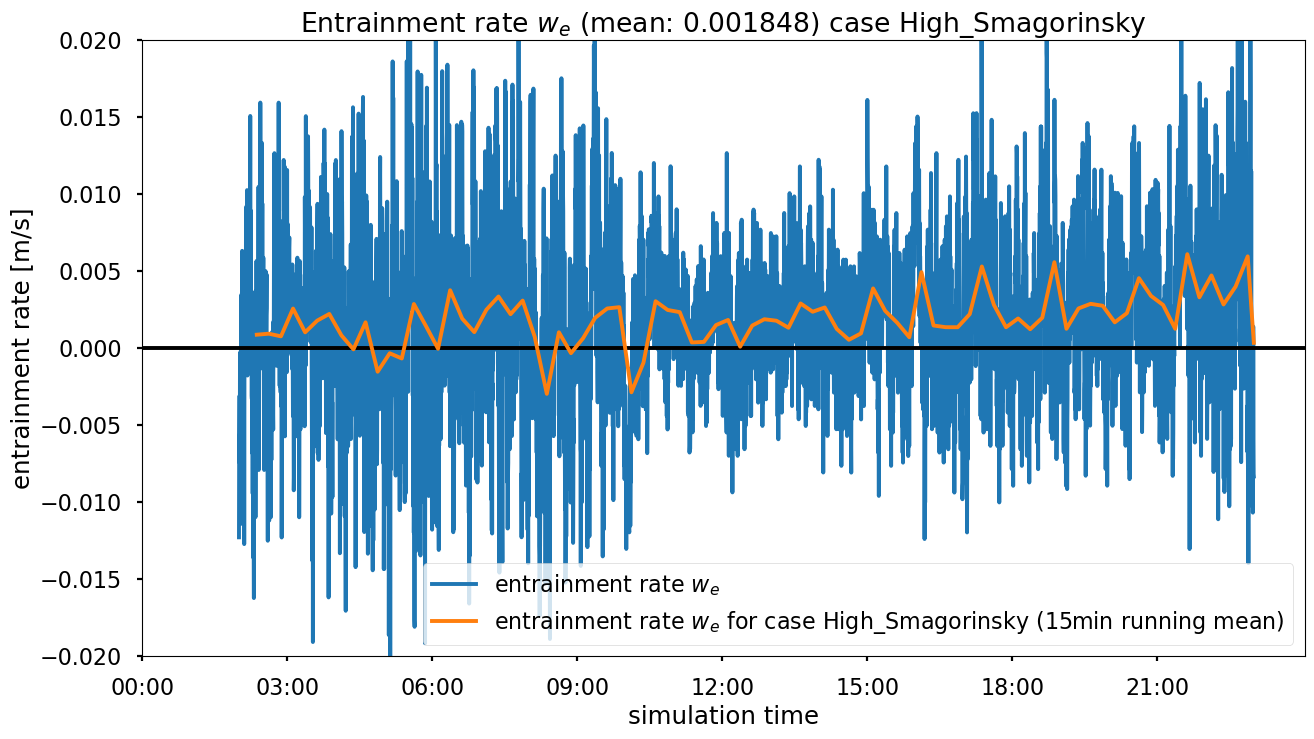

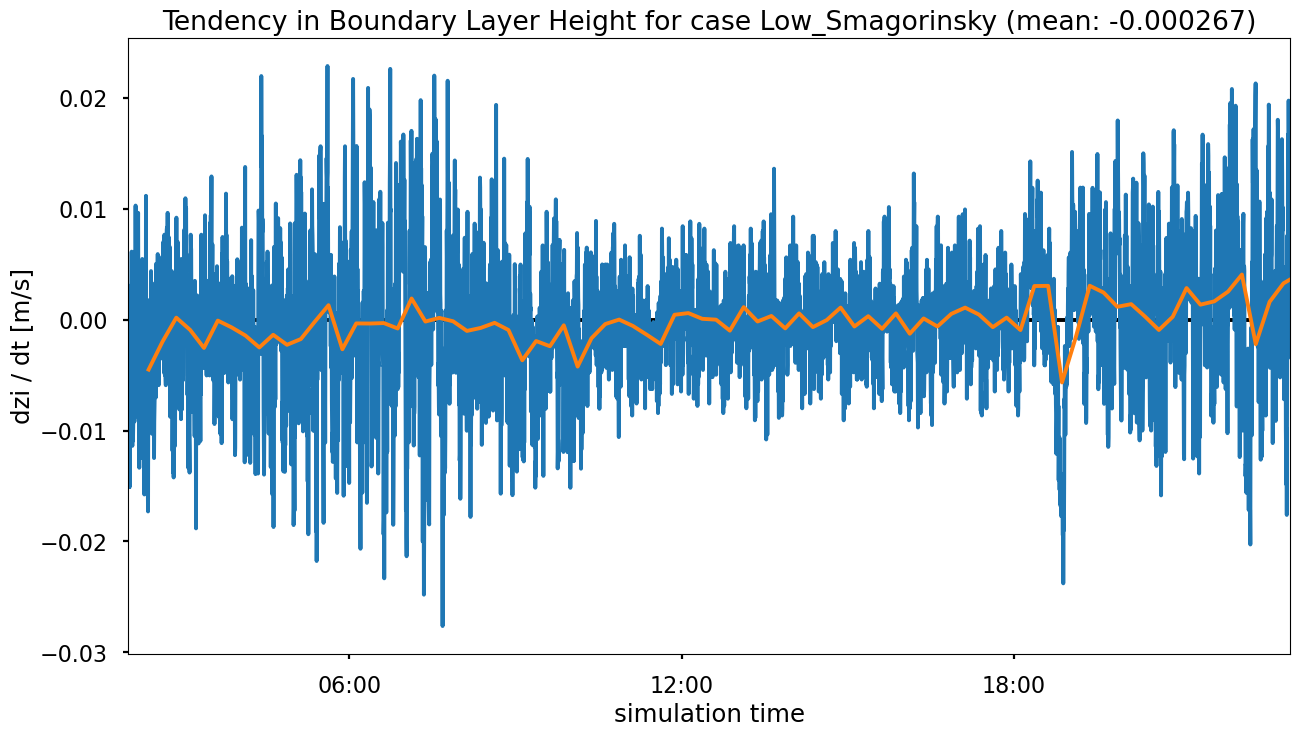

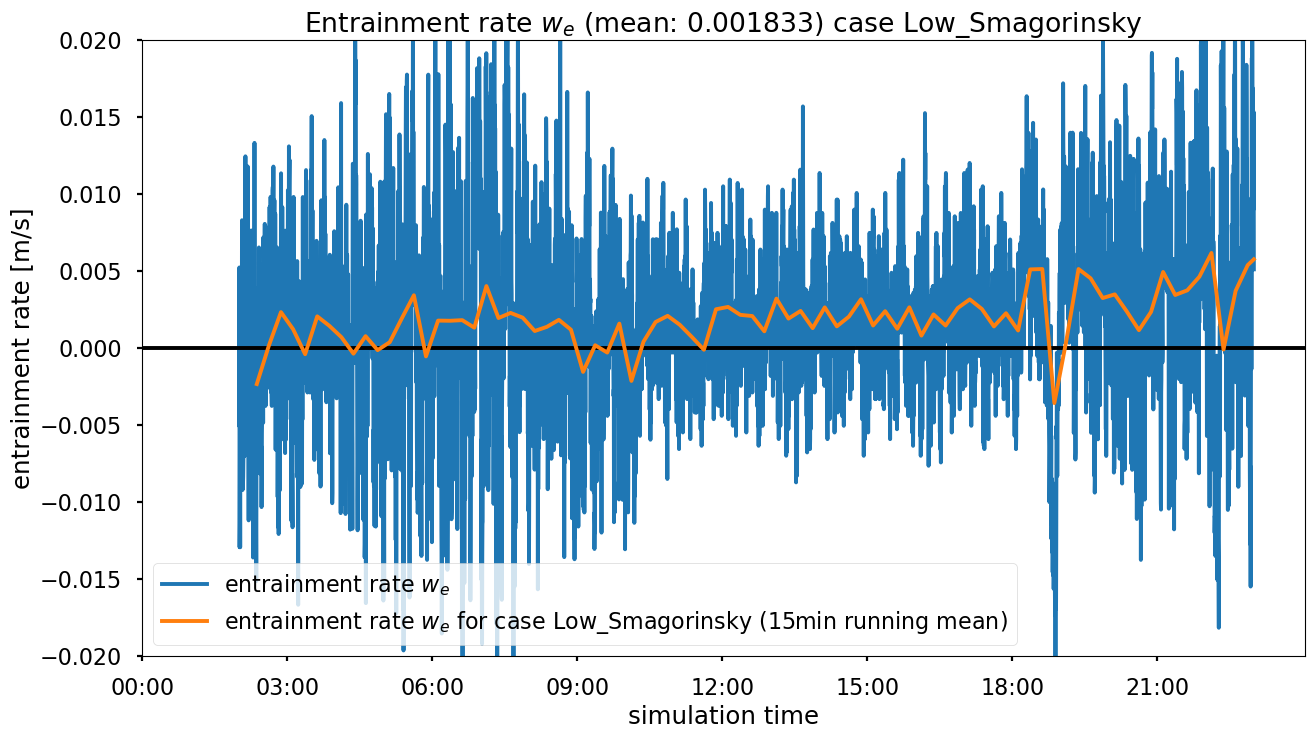

In [3]:
############################################################

for name, path in dictionary.items():
    print(name, path)

    ps_ds = xr.open_dataset(path+'rf01.ps.nc')
    ts_ds = xr.open_dataset(path+'rf01.ts.nc', engine="netcdf4")

    #############################################################
    
    dzdt = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)/\
        calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)
    
    dzdt15 = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                     .resample(time="15min").mean("time").values)/\
        calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                      .resample(time="15min").mean("time").values)
    
    plt.figure(figsize=(15,8))
    plt.title("Tendency in Boundary Layer Height for case "+name+" (mean: "+str(np.round(np.nanmean(dzdt), 6))+")")
    plt.axhline(0, color="black")
    plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values[1:], dzdt)
    plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                      .resample(time="15min").mean("time").values[1:], dzdt15)
    # Height of maximum theta gradient
    # plt.ylim(-0.025, 0.025)
    plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
                  ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])
    plt.xlim(np.datetime64("2000-01-01T02:00:00"), np.datetime64("2000-01-01T23:00:00"))
    plt.ylabel("dzi / dt [m/s]")
    plt.xlabel("simulation time")
    plt.savefig(outputdir+"height_tendency/"+name+"_pbl_height_diffs.png", facecolor="white")
    #################################################################
    

    
    
    dzdt = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)/\
        calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)
    # If that worked calculate entrainment as well:
    
    # Plot entrainment by time:
    dzdt = dzdt
    times = ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values[1:]
    
    
    dzdt15
    zis = ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values
    zi15 = ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
        .resample(time="15min").mean("time").values
    
    ##############################
    # Original:
    
    we = calculate_we_by_time(dzdt, zis, div=divergence)
    plt.figure(figsize=(15,8))
    plt.title("Entrainment rate $w_e$ (mean: "+str(np.round(np.nanmean(we),6))+") case "+name)
    plt.plot(times, we, label="entrainment rate $w_e$")
    plt.xlabel("simulation time")
    plt.ylabel("entrainment rate [m/s]")
        
    ##############################
    # Resampled:
    
    we15 = calculate_we_by_time(dzdt15, zi15, div=divergence)
    plt.axhline(0, color="black")
    plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                      .resample(time="15min").mean("time").values[1:], we15,\
             label="entrainment rate $w_e$ for case "+name+" (15min running mean)")
    plt.legend()
    plt.ylim(-0.02, 0.02)
    plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-02T00:00:00"),10800),\
                  ["00:00","03:00", "06:00", "09:00","12:00","15:00", "18:00","21:00"])
    plt.savefig(outputdir+"entrainment/"+name+"_entrainment.png", facecolor="white")

In [4]:
21600/2

10800.0